In [1]:
#LOGISTIC REGRESSION IN PYSPARK

In [2]:
#import SparkSession
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('LogisticTIC regression').getOrCreate()

In [4]:
#read the dataset
data_file = spark.read.csv('data_logistic_regression.csv', inferSchema=True, header=True)

In [6]:
#Showing first 10 records
data_file.show(10)

+-----------+-----------+-----+
|         x1|         x2|label|
+-----------+-----------+-----+
|75.01365839|30.60326323|    0|
|55.48216114|35.57070347|    0|
|95.86155507|38.22527806|    0|
| 93.1143888|38.80067034|    0|
| 56.2538175|39.26147251|    0|
|82.36875376|40.61825516|    0|
|66.56089447|41.09209808|    0|
|74.78925296|41.57341523|    0|
|60.45555629|42.50840944|    0|
|82.22666158|42.71987854|    0|
+-----------+-----------+-----+
only showing top 10 rows



In [7]:
#print dataframe columns and count
print(data_file.columns)
print(data_file.count())

['x1', 'x2', 'label']
80


In [8]:
data_file.printSchema()

root
 |-- x1: double (nullable = true)
 |-- x2: double (nullable = true)
 |-- label: integer (nullable = true)



In [9]:
#MISSING RECORDS
from pyspark.sql.functions import isnan, when, count, col

In [11]:
#checking miss values for specific columns
data_file.filter(data_file['x1'].isNull()).show()

+---+---+-----+
| x1| x2|label|
+---+---+-----+
+---+---+-----+



In [12]:
#checking miss values for specific columns
data_file.filter(data_file['x1'].isNull()).show()

+---+---+-----+
| x1| x2|label|
+---+---+-----+
+---+---+-----+



In [13]:
#checking miss values for specific columns
data_file.filter(data_file['label'].isNull()).show()

+---+---+-----+
| x1| x2|label|
+---+---+-----+
+---+---+-----+



In [15]:
data_file.select([count(when(isnan(c), c)).alias(c) for c in data_file.columns]).show()

+---+---+-----+
| x1| x2|label|
+---+---+-----+
|  0|  0|    0|
+---+---+-----+



In [16]:
print(data_file.count())

80


In [17]:
data_file.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|   48|
|    0|   32|
+-----+-----+



In [18]:
from pyspark.ml.feature import VectorAssembler

In [19]:
#Using vector assembler to combine all vectors and make it as a single column

In [20]:
data_file.columns

['x1', 'x2', 'label']

In [21]:
inputCols=[
        'x1','x2']
df_va = VectorAssembler(inputCols = inputCols, outputCol="features")

In [23]:
#transform the dataset with vector assembler
df = df_va.transform(data_file)

In [25]:
#showing input and output columns
df.select(inputCols + ["features"] ).show(10)

+-----------+-----------+--------------------+
|         x1|         x2|            features|
+-----------+-----------+--------------------+
|75.01365839|30.60326323|[75.01365839,30.6...|
|55.48216114|35.57070347|[55.48216114,35.5...|
|95.86155507|38.22527806|[95.86155507,38.2...|
| 93.1143888|38.80067034|[93.1143888,38.80...|
| 56.2538175|39.26147251|[56.2538175,39.26...|
|82.36875376|40.61825516|[82.36875376,40.6...|
|66.56089447|41.09209808|[66.56089447,41.0...|
|74.78925296|41.57341523|[74.78925296,41.5...|
|60.45555629|42.50840944|[60.45555629,42.5...|
|82.22666158|42.71987854|[82.22666158,42.7...|
+-----------+-----------+--------------------+
only showing top 10 rows



In [28]:
#Now we need only features and label to build our model. 
#We will use false keyword to avoid truncation
#Showing 20 rows
df.select(['features','label']).show(20,False)

+-------------------------+-----+
|features                 |label|
+-------------------------+-----+
|[75.01365839,30.60326323]|0    |
|[55.48216114,35.57070347]|0    |
|[95.86155507,38.22527806]|0    |
|[93.1143888,38.80067034] |0    |
|[56.2538175,39.26147251] |0    |
|[82.36875376,40.61825516]|0    |
|[66.56089447,41.09209808]|0    |
|[74.78925296,41.57341523]|0    |
|[60.45555629,42.50840944]|0    |
|[82.22666158,42.71987854]|0    |
|[67.37202755,42.83843832]|0    |
|[32.72283304,43.30717306]|0    |
|[34.21206098,44.2095286] |0    |
|[80.19018075,44.82162893]|1    |
|[89.84580671,45.35828361]|1    |
|[94.83450672,45.6943068] |1    |
|[51.04775177,45.82270146]|0    |
|[67.94685548,46.67857411]|0    |
|[51.54772027,46.85629026]|0    |
|[35.28611282,47.02051395]|0    |
+-------------------------+-----+
only showing top 20 rows



In [29]:
#New dataset has been created with necessary details after data manulpulation
df_new = df.select(['features','label'])
df_new.show(10)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[75.01365839,30.6...|    0|
|[55.48216114,35.5...|    0|
|[95.86155507,38.2...|    0|
|[93.1143888,38.80...|    0|
|[56.2538175,39.26...|    0|
|[82.36875376,40.6...|    0|
|[66.56089447,41.0...|    0|
|[74.78925296,41.5...|    0|
|[60.45555629,42.5...|    0|
|[82.22666158,42.7...|    0|
+--------------------+-----+
only showing top 10 rows



In [30]:
df_new.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|   48|
|    0|   32|
+-----+-----+



In [31]:
#Split data into train and test

In [33]:
train_data_file, test_data_file = df_new.randomSplit([0.70,0.30])

In [34]:
#split data into 70: 30 ratio
train_data_file.count()

54

In [35]:
test_data_file.count()

26

In [36]:
train_data_file.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|   35|
|    0|   19|
+-----+-----+



In [37]:
test_data_file.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|   13|
|    0|   13|
+-----+-----+



In [38]:
#Creating logistic regression model and train
from pyspark.ml.classification import LogisticRegression

In [39]:
log_model = LogisticRegression(labelCol='label')
log_model

LogisticRegression_dad39230e28d

In [40]:
#Train the model
trainlog_model = log_model.fit(train_data_file)

In [41]:
trainlog_model

LogisticRegressionModel: uid=LogisticRegression_dad39230e28d, numClasses=2, numFeatures=2

In [43]:
#Evalute the model
#Know the predictons of the model
#train predictions

train_predict = trainlog_model.evaluate(train_data_file).predictions
train_predict.show(10)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[30.05882245,49.5...|    0|[13.5163915746619...|[0.99999865133173...|       0.0|
|[34.18364003,75.2...|    0|[3.63234085531994...|[0.97422760138814...|       0.0|
|[34.21206098,44.2...|    0|[14.0197036522638...|[0.99999918469573...|       0.0|
|[35.28611282,47.0...|    0|[12.7415529601814...|[0.99999707306830...|       0.0|
|[40.45755098,97.5...|    1|[-5.8030962733831...|[0.00300911301550...|       1.0|
|[42.07545454,78.8...|    0|[-0.0473136950780...|[0.48817378231503...|       1.0|
|[42.26170081,87.1...|    1|[-2.8729015107708...|[0.05350951086959...|       1.0|
|[44.66826172,66.4...|    0|[3.29377994283268...|[0.96421480868050...|       0.0|
|[47.26426911,88.4...|    1|[-4.8990052582194...|[0.00739884324914...|       1.0|
|[50.4581598,75.

In [44]:
#Our trained model made a mistake of predicting for 6th row instaed of 0 it predicted 1
#Print label, prediction and probability and ratios
#Using multiple filters, we can count various metrics. Let us first count 0 and 1 in lables:

In [45]:
train_count_1 = train_data_file.filter(train_data_file['label'] == 1).count()
train_count_0 = train_data_file.filter(train_data_file['label'] == 0).count()
train_count_1, train_count_0

(35, 19)

In [48]:
#Eval correct predictions
correct_predictions = train_predict.filter(
train_predict['label'] == 1).filter(
train_predict['prediction'] == 1).select(
['label','prediction','probability'])
print("Correct predictions: ", correct_predictions.count())
accuracy = (correct_predictions.count()) /  train_count_1
print(f"Accuracy: {accuracy}\n")
correct_predictions.show(20,False)

Correct predictions:  33
Accuracy: 0.9428571428571428

+-----+----------+------------------------------------------+
|label|prediction|probability                               |
+-----+----------+------------------------------------------+
|1    |1.0       |[0.003009113015504938,0.9969908869844951] |
|1    |1.0       |[0.05350951086959895,0.946490489130401]   |
|1    |1.0       |[0.007398843249142807,0.9926011567508571] |
|1    |1.0       |[0.16040484066646168,0.8395951593335383]  |
|1    |1.0       |[0.02029882755429684,0.9797011724457032]  |
|1    |1.0       |[0.01680725652444675,0.9831927434755533]  |
|1    |1.0       |[0.032541883343978346,0.9674581166560217] |
|1    |1.0       |[0.0012895395789295125,0.9987104604210705]|
|1    |1.0       |[4.715378301671804E-4,0.9995284621698328] |
|1    |1.0       |[2.5598102375677967E-5,0.9999744018976243]|
|1    |1.0       |[3.327342308629649E-7,0.9999996672657692] |
|1    |1.0       |[1.1040099089773255E-6,0.9999988959900911]|
|1    |1.0     

  #(2) Please draw a ROC curse using "matplotlib.pyplot". Its x-axis is "False Positive Rate", and y-axis is  "True Positive Rate". (3 points)#

False positive:

In [50]:
fp = train_predict.filter(
train_predict['label'] == 0).filter(
train_predict['prediction'] == 1).select(
['label','prediction','probability'])
print("False positive: ", fp.count())
fp.show(10,False)


False positive:  3
+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0    |1.0       |[0.4881737823150336,0.5118262176849664] |
|0    |1.0       |[0.35956730993747293,0.640432690062527] |
|0    |1.0       |[0.37391561294306613,0.6260843870569339]|
+-----+----------+----------------------------------------+



False positive:

In [52]:
fp = train_predict.filter(
train_predict['label'] == 0).filter(
train_predict['prediction'] == 1).select(
['label','prediction','probability'])
print("False positive: ", fp.count())
fp.show(10,False)

False positive:  3
+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0    |1.0       |[0.4881737823150336,0.5118262176849664] |
|0    |1.0       |[0.35956730993747293,0.640432690062527] |
|0    |1.0       |[0.37391561294306613,0.6260843870569339]|
+-----+----------+----------------------------------------+



In [55]:
#Predict test data
test_predict = trainlog_model.evaluate(test_data_file).predictions
test_predict.show(10, False)

+-------------------------+-----+------------------------------------------+------------------------------------------+----------+
|features                 |label|rawPrediction                             |probability                               |prediction|
+-------------------------+-----+------------------------------------------+------------------------------------------+----------+
|[32.72283304,43.30717306]|0    |[14.788351028163557,-14.788351028163557]  |[0.9999996219923509,3.780076490711437E-7] |0.0       |
|[33.91550011,98.86943574]|0    |[-4.2017085265174,4.2017085265174]        |[0.014749183397691613,0.9852508166023084] |1.0       |
|[38.7858038,64.99568096] |0    |[5.622999611630853,-5.622999611630853]    |[0.996399227533402,0.003600772466597957]  |0.0       |
|[39.53833914,98.9554206] |0    |[-5.991135639520181,5.991135639520181]    |[0.0024945838929209844,0.997505416107079] |1.0       |
|[49.07256322,51.88321182]|0    |[6.795466181330667,-6.795466181330667]    |[0.9988

Correct predictions on Test Data

In [53]:
test_count_1 = test_data_file.filter(test_data_file['label'] == 1).count()
test_count_0 = test_data_file.filter(test_data_file['label'] == 0).count()
test_count_1, test_count_0

(13, 13)

In [57]:
cp_test = test_predict.filter(
test_predict['label'] == 1).filter(
test_predict['prediction'] == 1).select(
['label','prediction','probability'])
print("Correct predictions: ", cp_test.count())
accuracy = (cp_test.count()) /  test_count_1
print(f"Accuracy: {accuracy}\n")
cp_test.show(5,False)

Correct predictions:  12
Accuracy: 0.9230769230769231

+-----+----------+-----------------------------------------+
|label|prediction|probability                              |
+-----+----------+-----------------------------------------+
|1    |1.0       |[0.49611333833103904,0.503886661668961]  |
|1    |1.0       |[7.138553254986067E-4,0.9992861446745014]|
|1    |1.0       |[0.013435728703908975,0.986564271296091] |
|1    |1.0       |[0.1430211837919665,0.8569788162080335]  |
|1    |1.0       |[0.020931683657660335,0.9790683163423397]|
+-----+----------+-----------------------------------------+
only showing top 5 rows



In [58]:
#False Positive
fp = test_predict.filter(
test_predict['label'] == 0).filter(
test_predict['prediction'] == 1).select(
['label','prediction','probability'])
print("False positive: ", fp.count())
fp.show(5,False)

False positive:  4
+-----+----------+-----------------------------------------+
|label|prediction|probability                              |
+-----+----------+-----------------------------------------+
|0    |1.0       |[0.014749183397691613,0.9852508166023084]|
|0    |1.0       |[0.0024945838929209844,0.997505416107079]|
|0    |1.0       |[0.06840553792637286,0.9315944620736272] |
|0    |1.0       |[0.03630416124001713,0.9636958387599829] |
+-----+----------+-----------------------------------------+



In [63]:
trainlog_model.summary.roc.select('FPR').collect()
trainlog_model.summary.roc.select('TPR').collect()

[Row(TPR=0.0),
 Row(TPR=0.02857142857142857),
 Row(TPR=0.05714285714285714),
 Row(TPR=0.08571428571428572),
 Row(TPR=0.11428571428571428),
 Row(TPR=0.14285714285714285),
 Row(TPR=0.17142857142857143),
 Row(TPR=0.2),
 Row(TPR=0.22857142857142856),
 Row(TPR=0.2571428571428571),
 Row(TPR=0.2857142857142857),
 Row(TPR=0.3142857142857143),
 Row(TPR=0.34285714285714286),
 Row(TPR=0.37142857142857144),
 Row(TPR=0.4),
 Row(TPR=0.42857142857142855),
 Row(TPR=0.45714285714285713),
 Row(TPR=0.4857142857142857),
 Row(TPR=0.5142857142857142),
 Row(TPR=0.5428571428571428),
 Row(TPR=0.5714285714285714),
 Row(TPR=0.6),
 Row(TPR=0.6285714285714286),
 Row(TPR=0.6571428571428571),
 Row(TPR=0.6857142857142857),
 Row(TPR=0.7142857142857143),
 Row(TPR=0.7428571428571429),
 Row(TPR=0.7714285714285715),
 Row(TPR=0.8),
 Row(TPR=0.8285714285714286),
 Row(TPR=0.8571428571428571),
 Row(TPR=0.8857142857142857),
 Row(TPR=0.9142857142857143),
 Row(TPR=0.9142857142857143),
 Row(TPR=0.9142857142857143),
 Row(TPR=0.942

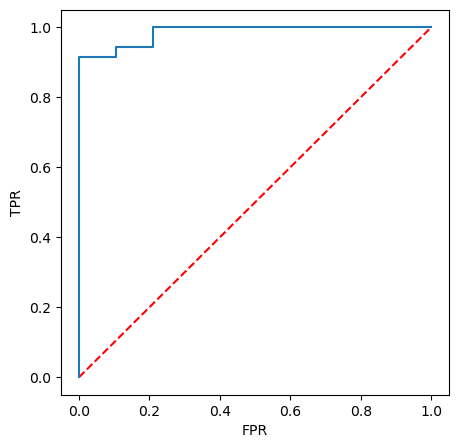

In [64]:

plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(trainlog_model.summary.roc.select('FPR').collect(),
         trainlog_model.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()